# Data Foursquare

The data is from Foursquare and is reached by API calls. 
Foursquare data is crowd sourced. Because the project is focused on young people able to use internet and social media, the data are representative. 

# Python 

The data is loaded into Python pandas dataframes for processing. It is also visualised by Folium because we work with exact locations. The latitude and longitude has an accuracy of 10^-6 which represents about 0,11m. Also Matplotlib is used to present and visualize the findings.

In [1]:
import requests # library to handle requests
import pandas as pd # library for dataframe
import folium # plotting library
import matplotlib # library for visualization
import matplotlib.pyplot as plt

I  focus on geographical city center witch is not the same as the touristic center but almost exactly a spot with a vivid nightlife
- latitude = 50.85
- longitude = 4.35
- radius = 2000m

In [2]:
latitudeBX = 50.85 #center Brussels 
longitudeBX = 4.35  #center Brussels 
LIMITBX = 100
radiusBX = 2000

To find the distribution of "Sorority House" + "Fraternity" + "College Residence Hall" I use the respectievely categoryId's in following 3 code sections.

In [3]:
categoryId_c1 = '4bf58dd8d48988d141941735' # Sorority House

CLIENT_ID = 'KV5PROEPKIURI0FD411T0CWK3XKCWA0L2XS21ANYADSFRSQR' # your Foursquare ID
CLIENT_SECRET = 'XOQTOF4RXX5142NVBXRUALMHWLYLXGTIWHTFPRFAYQQETVZL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

url = 'https://api.foursquare.com/v2/venues/explore?&categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    categoryId_c1,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitudeBX,
    longitudeBX,
    radiusBX,
    LIMITBX)
results = requests.get(url).json()
venues = results['response']['groups'][0]['items'] 
college1 = pd.json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.location.lat', 'venue.location.lng']
college1 = college1.loc[:, filtered_columns]
# clean columns
college1.columns = [col.split(".")[-1] for col in college1.columns]

In [4]:
categoryId_c2 = '4bf58dd8d48988d1b0941735' # Fraternity

url = 'https://api.foursquare.com/v2/venues/explore?&categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    categoryId_c2,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitudeBX,
    longitudeBX,
    radiusBX,
    LIMITBX)
results = requests.get(url).json()
venues = results['response']['groups'][0]['items']
    
college2 = pd.json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.location.lat', 'venue.location.lng']
college2 = college2.loc[:, filtered_columns]
# clean columns
college2.columns = [col.split(".")[-1] for col in college2.columns]

With "College Residence Hall" I encounter a problem. Apparently "Br(ik Koten" is an organisation with different locations. In Foursquare all different sites have the exact same name. Of course each different place have to be uniquely identified so I need to add a suffix. 

In [5]:
categoryId_c3 = '4bf58dd8d48988d1a3941735' # college residence hall

url = 'https://api.foursquare.com/v2/venues/explore?&categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    categoryId_c3,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitudeBX,
    longitudeBX,
    radiusBX,
    LIMITBX)
results = requests.get(url).json()
venues = results['response']['groups'][0]['items'] 
college3 = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.location.lat', 'venue.location.lng']
college3 = college3.loc[:, filtered_columns]
# clean columns
college3.columns = [col.split(".")[-1] for col in college3.columns]
college3

,name,lat,lng
0,Br(ik Koten,50.849722,4.348143
1,Br(ik Koten,50.852550,4.346020
2,Br(ik Koten,50.847990,4.344484
3,Br(ik Koten,50.852499,4.355070
4,Br(ik Koten,50.847403,4.344989
5,B-02-09,50.848982,4.357107
6,Koten - Broekstraat,50.850643,4.357889
7,Br(ik Koten,50.855240,4.353229
8,Br(ik Koten,50.846171,4.342573
9,Br(ik Koten,50.845926,4.342485


For all different sites of "Br(ik Koten" I add a suffix and process it again in the same format of the other 2 dataframes.

In [6]:
suffix = pd.DataFrame({'nr':['1','2','3','4','5', '','','6','7', '8','']})

In [7]:
college3['name+nr'] = college3['name'].str.cat(suffix,sep=" ")
college3

,name,lat,lng,name+nr
0,Br(ik Koten,50.849722,4.348143,Br(ik Koten 1
1,Br(ik Koten,50.852550,4.346020,Br(ik Koten 2
2,Br(ik Koten,50.847990,4.344484,Br(ik Koten 3
3,Br(ik Koten,50.852499,4.355070,Br(ik Koten 4
4,Br(ik Koten,50.847403,4.344989,Br(ik Koten 5
5,B-02-09,50.848982,4.357107,B-02-09
6,Koten - Broekstraat,50.850643,4.357889,Koten - Broekstraat
7,Br(ik Koten,50.855240,4.353229,Br(ik Koten 6
8,Br(ik Koten,50.846171,4.342573,Br(ik Koten 7
9,Br(ik Koten,50.845926,4.342485,Br(ik Koten 8


In [8]:
college3 = college3[['name+nr','lat','lng']]
college3.columns = ['name','lat', 'lng']
college3

,name,lat,lng
0,Br(ik Koten 1,50.849722,4.348143
1,Br(ik Koten 2,50.852550,4.346020
2,Br(ik Koten 3,50.847990,4.344484
3,Br(ik Koten 4,50.852499,4.355070
4,Br(ik Koten 5,50.847403,4.344989
5,B-02-09,50.848982,4.357107
6,Koten - Broekstraat,50.850643,4.357889
7,Br(ik Koten 6,50.855240,4.353229
8,Br(ik Koten 7,50.846171,4.342573
9,Br(ik Koten 8,50.845926,4.342485


Now that I have cleaned and pre-processed the data of all dorms, I need to append the 3 dataframes in one dataframe with the latitude and longitude

My solutions has 20 locations witch I store in the dataframe “Sleepplaces” and can visualize with folium.

In [9]:
Sleepplaces =  pd.DataFrame.append((pd.DataFrame.append(college1, college2)), college3)
# change column names to avoid confusion with "name"
Sleepplaces.columns = ['Sleepplace', 'lat', 'lng']
Sleepplaces.set_index(['Sleepplace'])
Sleepplaces                                    

,Sleepplace,lat,lng
0,AIESEC,50.848995,4.357088
1,Van der Jeugt's paradijs,50.847073,4.340534
2,Aloisiana Lokaal (7120),50.848614,4.357599
3,Centre Scolaire Des Dames De Marie Haecht,50.856642,4.369727
0,AIESEC HUB Office,50.850000,4.355398
1,AIESEC,50.848995,4.357088
2,2.23,50.847965,4.343223
3,Aloisiana Lokaal (7120),50.848614,4.357599
4,Club House - CSL,50.853179,4.360709
5,Brusello Student Residence,50.841849,4.346309


In [10]:
map_Brussel = folium.Map(location=[latitudeBX, longitudeBX], zoom_start=13)

for lat, lng in zip(Sleepplaces['lat'], Sleepplaces['lng']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Brussel) 

# add a red circle marker to represent the center
folium.features.CircleMarker([latitudeBX, longitudeBX],
    radius=8,
    color='lightred',
    popup='Center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.7
).add_to(map_Brussel)

map_Brussel

The red spot is the geographical center and all sleepplaces in blue around it with a radius of 2000m are shown. The main roads around the city center mark an area with a pentagon-shape. 3 dorms are located nearby but just outside, the other 17 are located even closer to the center.

With the dataframe of the 20 Dorms ("Sleepplaces") and their exact geographical locations, I now can also use those latitudes and longitudes to find the Nightlife around each spot. I loop in the dataframe and send out a API call for each location and store all found Nightlife for each dorm in a new dataframe. I can do this for any given radius.

In [11]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name']
nearby_venues =nearby_venues.loc[:, filtered_columns]


In [12]:
CLIENT_ID = 'KV5PROEPKIURI0FD411T0CWK3XKCWA0L2XS21ANYADSFRSQR' # your Foursquare ID
CLIENT_SECRET = 'XOQTOF4RXX5142NVBXRUALMHWLYLXGTIWHTFPRFAYQQETVZL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
categoryId_N = '4d4b7105d754a06376d81259' # Nightlife
LIMIT_N = 100

In [13]:
def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(Sleepplaces['Sleepplace'], Sleepplaces['lat'], Sleepplaces['lng']):
        url = 'https://api.foursquare.com/v2/venues/explore?&categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        categoryId_N,
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat,
        lng,
        radius_N,
        LIMIT_N)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Sleepplace',
                             'Sleepplace Latitude', 
                             'Sleepplace Longitude', 
                             'Nightlife', 
                             'Nightlife Latitude', 
                             'Nightlife Longitude']
    
    return(nearby_venues)
nearby_venues

,venue.name
0,Br(ik Koten
1,Br(ik Koten
2,Br(ik Koten
3,Br(ik Koten
4,Br(ik Koten
5,B-02-09
6,Koten - Broekstraat
7,Br(ik Koten
8,Br(ik Koten
9,Br(ik Koten


Since My focus is how much nightlife there is in close proximity of the dorms/sleepplaces I choose a small radius.

It is very interesting to know how much bars are in the surrounding within 50m of the sleepplace but of course if by coincidence a hotspot for bars is situated some 150m of the sleepplace this has a considerable effet. Therefore I choose radius 50m, 100m, 150m en 200m.

Bigger radius than 200m is not relevant anymore since all dorms are located in a radius of 2000m and sometimes 2 different dorms are closer than 200m. Using a radius that is too large will only present a bar nearby a lot of dorms.

In [14]:
radius_N = 200
bars = getNearbyVenues(names=Sleepplaces['Sleepplace'],
                                   latitudes=Sleepplaces['lat'],
                                   longitudes=Sleepplaces['lng']
                                  )

bars = bars[['Sleepplace', 'Nightlife']]
result200 = bars.groupby('Sleepplace').count()

In [15]:
radius_N = 150
bars = getNearbyVenues(names=Sleepplaces['Sleepplace'],
                                   latitudes=Sleepplaces['lat'],
                                   longitudes=Sleepplaces['lng']
                                  )

bars = bars[['Sleepplace', 'Nightlife']]
result150 = bars.groupby('Sleepplace').count()

In [16]:
radius_N = 100
bars = getNearbyVenues(names=Sleepplaces['Sleepplace'],
                                   latitudes=Sleepplaces['lat'],
                                   longitudes=Sleepplaces['lng']
                                  )

bars = bars[['Sleepplace', 'Nightlife']]
result100 = bars.groupby('Sleepplace').count()

In [17]:
radius_N = 50
bars = getNearbyVenues(names=Sleepplaces['Sleepplace'],
                                   latitudes=Sleepplaces['lat'],
                                   longitudes=Sleepplaces['lng']
                                  )

bars = bars[['Sleepplace', 'Nightlife']]
result50 = bars.groupby('Sleepplace').count()

With those results I can make the final result if I concatenate them

In [18]:
result = pd.concat([result200, result150, result100, result50], axis=1)

I sort by r200m and rename the columns for clearity

In [20]:
result.columns = ['r200m','r150m','r100m','r50m']
result.sort_values(by=['r200m'], ascending=False, inplace=True)
result

,r200m,r150m,r100m,r50m
Br(ik Koten 1,32,21.0,9.0,2.0
AIESEC,30,14.0,12.0,2.0
AIESEC HUB Office,22,11.0,3.0,NaN
Aloisiana Lokaal (7120),18,14.0,2.0,2.0
B-02-09,15,7.0,6.0,1.0
Br(ik Koten 2,13,11.0,6.0,3.0
Br(ik Koten 5,11,5.0,1.0,NaN
Br(ik Koten 6,8,6.0,4.0,NaN
Koten - Broekstraat,7,5.0,3.0,3.0
Art Upkot,6,2.0,2.0,1.0


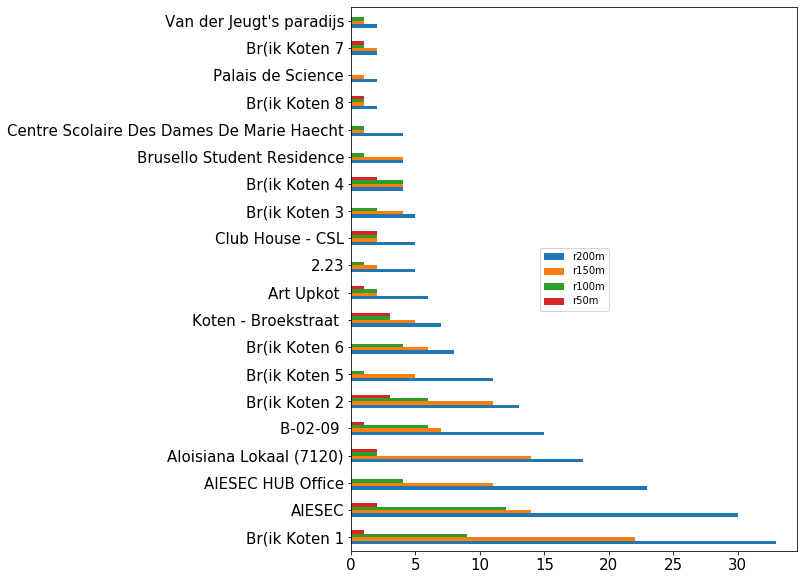

In [51]:
result.plot(kind='barh', figsize = (8,10))
plt.legend(loc='center')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

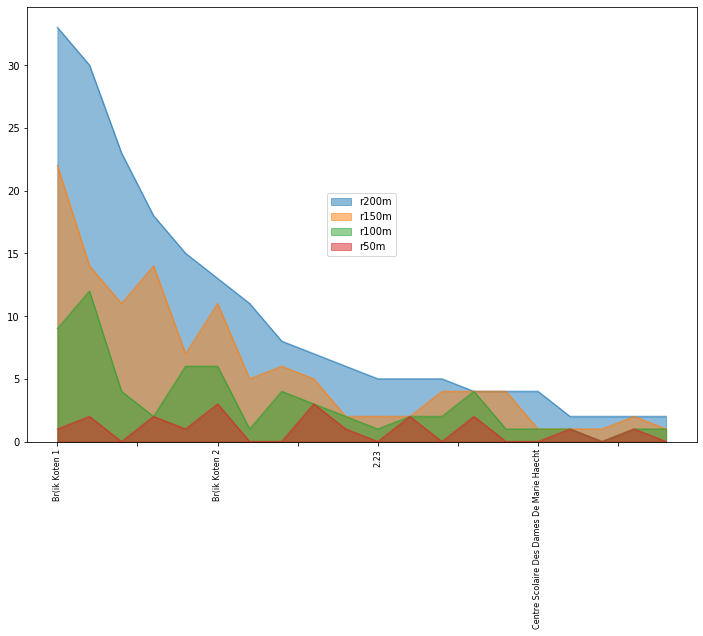

In [53]:
result.plot(kind='area', rot=90, stacked = False, figsize = (12,8))
plt.legend(loc='center')
plt.tick_params(axis='x', labelsize=8)

Depending on interst of bar opener the dataframe can also be sorted by column 'r50m'

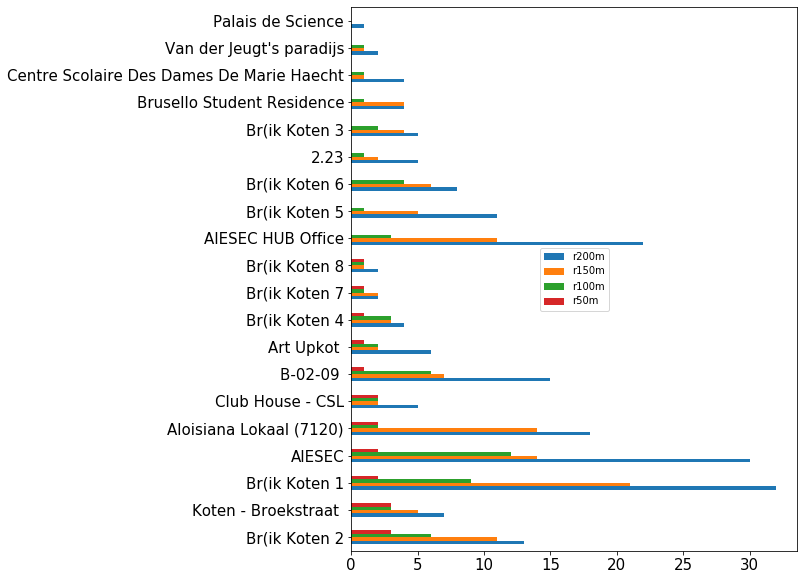

In [21]:
result_sortby50 = result
result_sortby50.sort_values(by=['r50m'], ascending=False, inplace=True)
result_sortby50.plot(kind='barh', figsize = (8,10))
plt.legend(loc='center')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

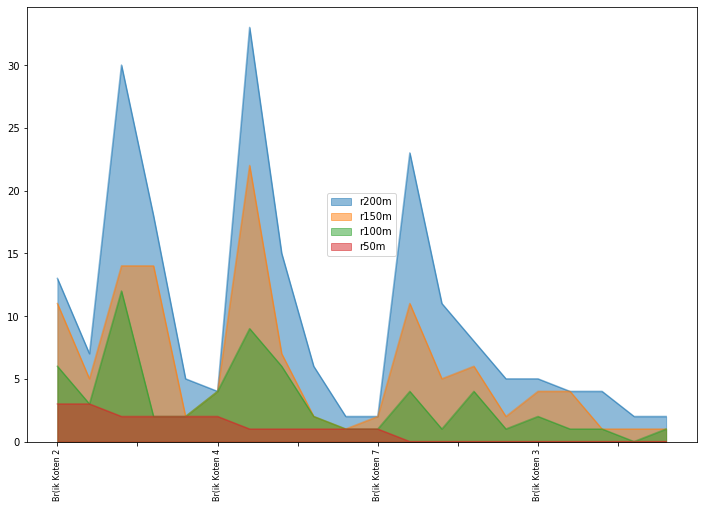

In [55]:
result_sortby50.plot(kind='area', rot=90, stacked = False, figsize = (12,8))
plt.legend(loc='center')
plt.tick_params(axis='x', labelsize=8)

If the bar opener is only interested in dorms without nightlife within a radius of 50 m, new visualizations can be made

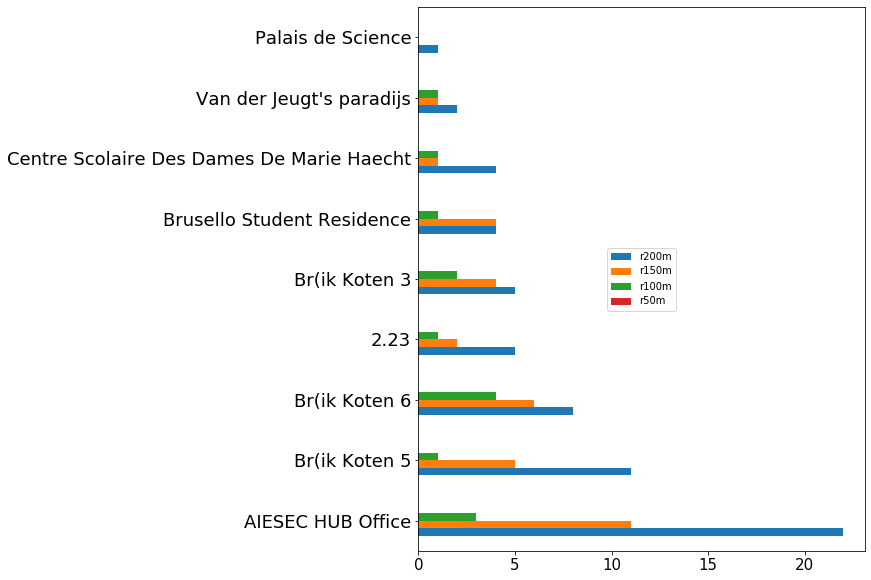

In [22]:
result_close = result_sortby50.tail(9)
result_close.plot(kind='barh', figsize = (8,10))
plt.legend(loc='center')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=18)

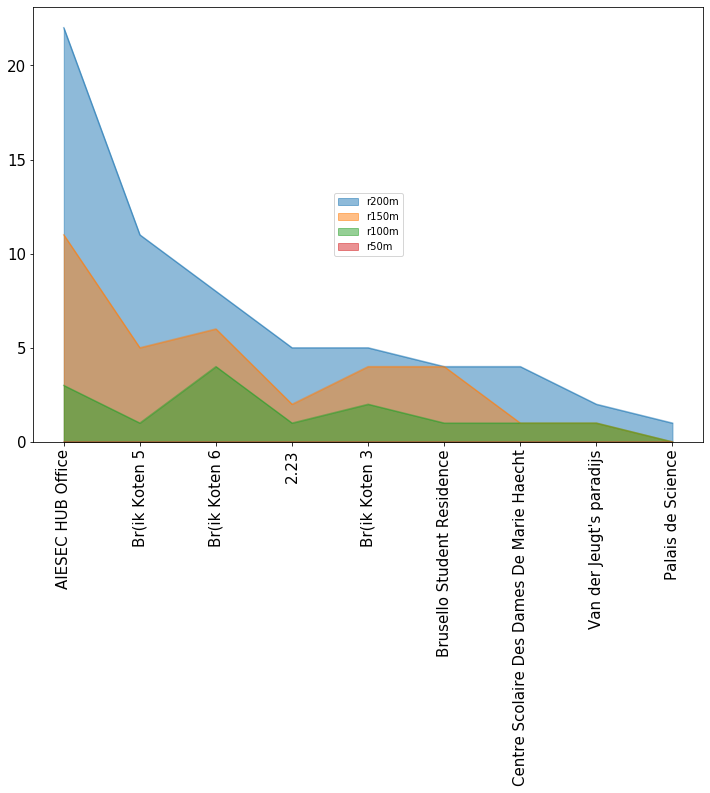

In [23]:
result_close.plot(kind='area', rot=90, stacked = False, figsize = (12,8))
plt.legend(loc='center')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

In [25]:
result_6best = result_sortby50.tail(6)
result_6best

,r200m,r150m,r100m,r50m
2.23,5,2.0,1.0,NaN
Br(ik Koten 3,5,4.0,2.0,NaN
Brusello Student Residence,4,4.0,1.0,NaN
Centre Scolaire Des Dames De Marie Haecht,4,1.0,1.0,NaN
Van der Jeugt's paradijs,2,1.0,1.0,NaN
Palais de Science,1,NaN,NaN,NaN
